In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
%matplotlib inline

In [3]:
from tensorflow.keras.datasets import mnist

In [11]:
(X_train,y_train),(X_test,y_test)=mnist.load_data()

In [12]:
X_train.shape

(60000, 28, 28)

In [13]:
X_test.shape

(10000, 28, 28)

In [14]:
single_image = X_train[0]

In [15]:
single_image

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

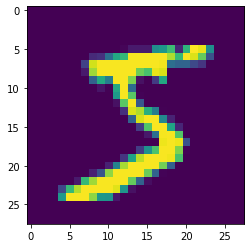

In [16]:
plt.imshow(single_image)

In [17]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [18]:
from tensorflow.keras.utils import to_categorical

In [19]:
y_train.shape

(60000,)

In [20]:
y_exm = to_categorical(y_train)

In [21]:
y_exm.shape

(60000, 10)

In [22]:
y_exm[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [26]:
y_cat_test = to_categorical(y_test,10)

In [27]:
y_cat_test.shape

(10000, 10)

In [28]:
y_cat_train = to_categorical(y_train,10)

In [29]:
y_cat_train.shape

(60000, 10)

In [30]:
single_image.max()

255

In [31]:
single_image.min()

0

In [32]:
X_train = X_train/255

In [33]:
X_test = X_test/255

In [34]:
scaled_image = X_train[0]

In [35]:
scaled_image

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

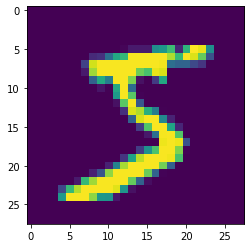

In [36]:
plt.imshow(scaled_image)

In [37]:
X_train = X_train.reshape(60000,28,28,1)

In [38]:
X_test = X_test.reshape(10000,28,28,1)

In [39]:
from tensorflow.keras.models import Sequential

In [42]:
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPool2D

In [44]:
model = Sequential()
model.add(Conv2D(filters=32,kernel_size=(4,4),strides=(1,1),input_shape=(28,28,1),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(128,activation='relu'))

#Output layer SOFTMAX-->Multi Class
model.add(Dense(10,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [45]:
from tensorflow.keras.callbacks import EarlyStopping

In [46]:
early_stop = EarlyStopping(monitor='val_loss',patience=1)

In [47]:
model.fit(X_train,y_cat_train,epochs=10,validation_data=(X_test,y_cat_test),callbacks=[early_stop])

Epoch 1/10
1875/1875 [==============================] - 31s 16ms/step - loss: 0.1375 - accuracy: 0.9579 - val_loss: 0.0539 - val_accuracy: 0.9828
Epoch 2/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0462 - accuracy: 0.9854 - val_loss: 0.0447 - val_accuracy: 0.9847
Epoch 3/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0284 - accuracy: 0.9908 - val_loss: 0.0366 - val_accuracy: 0.9879
Epoch 4/10
1875/1875 [==============================] - 29s 16ms/step - loss: 0.0198 - accuracy: 0.9935 - val_loss: 0.0358 - val_accuracy: 0.9887
Epoch 5/10
1875/1875 [==============================] - 29s 16ms/step - loss: 0.0134 - accuracy: 0.9956 - val_loss: 0.0515 - val_accuracy: 0.9859


In [48]:
metrics = pd.DataFrame(model.history.history)

In [49]:
metrics

,loss,accuracy,val_loss,val_accuracy
0,0.137473,0.957900,0.053884,0.9828
1,0.046202,0.985417,0.044662,0.9847
2,0.028429,0.990767,0.036610,0.9879
3,0.019793,0.993517,0.035770,0.9887
4,0.013400,0.995633,0.051457,0.9859


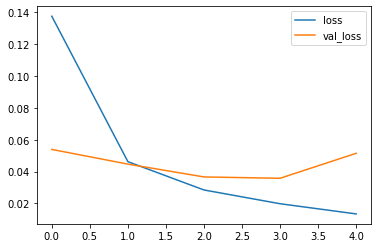

In [50]:
metrics[['loss','val_loss']].plot()

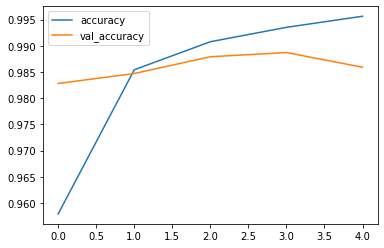

In [51]:
metrics[['accuracy','val_accuracy']].plot()

In [53]:
model.evaluate(X_test,y_cat_test,verbose=0)

[0.05145705118775368, 0.9858999848365784]

In [56]:
from sklearn.metrics import classification_report,confusion_matrix

In [57]:
y_cat_test.shape

(10000, 10)

In [58]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [59]:
predictions = model.predict_classes(X_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [60]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.99      0.99      1032
           3       0.97      1.00      0.98      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.97      0.98       892
           6       0.99      0.98      0.99       958
           7       1.00      0.98      0.99      1028
           8       0.98      0.99      0.98       974
           9       0.99      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [61]:
print(confusion_matrix(y_test,predictions))

[[ 976    0    2    1    0    0    1    0    0    0]
 [   3 1124    1    2    0    1    3    0    1    0]
 [   2    1 1024    0    0    0    1    3    1    0]
 [   0    0    1 1007    0    0    0    0    2    0]
 [   1    0    1    0  971    0    3    0    1    5]
 [   2    0    0   21    0  862    1    0    5    1]
 [   7    2    0    0    2    3  941    0    3    0]
 [   1    3    8    4    1    0    0 1007    1    3]
 [   6    0    5    1    0    0    0    0  960    2]
 [   3    1    1    3    7    2    0    2    3  987]]


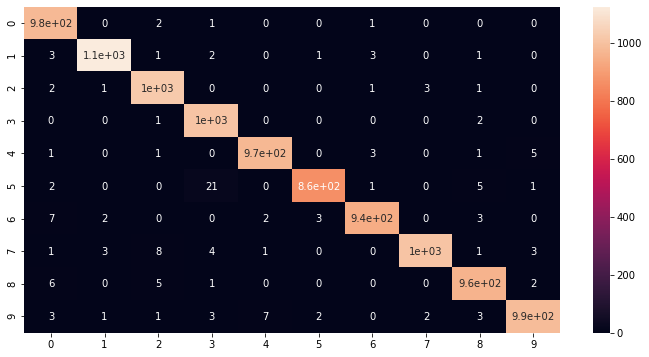

In [65]:
plt.figure(figsize=(12,6))
sns.heatmap(confusion_matrix(y_test,predictions),annot=True)

In [66]:
my_number=X_test[0]

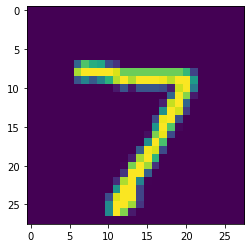

In [69]:
plt.imshow(my_number.reshape(28,28))

In [70]:
#num_images,width,height,color_channels
model.predict_classes(my_number.reshape(1,28,28,1))

array([7], dtype=int64)